1. Data Exploration and Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#Load the dataset into a Pandas DataFrame and display the first 5 rows.
df = pd.read_csv("data.csv")
df.head()

,Order_ID,Customer_ID,Order_Date,Product,Category,Quantity,Unit_Price,Payment_Method,Order_Status,City,Total_Amount
0,1,8270,2023-09-10,Headphones,Home Appliances,11,582.55,Cash,Completed,Hyderabad,6408.05
1,2,1860,2023-03-14,Laptop,Accessories,8,1635.00,PayPal,Completed,Hyderabad,13080.00
2,3,6390,2023-08-02,Headphones,Electronics,6,877.67,UPI,Completed,Pune,5266.02
3,4,6191,2024-01-14,TV,Accessories,9,2237.20,Credit Card,Completed,Pune,20134.80
4,5,6734,2023-10-26,Laptop,Accessories,7,1359.89,Credit Card,Completed,Mumbai,9519.23


In [3]:
#Check the dataset shape, column names, data types, and summary statistics.
df.shape

(50000, 11)

In [4]:
#summaryy
df.describe

<bound method NDFrame.describe of        Order_ID  Customer_ID  Order_Date     Product         Category  \
0             1         8270  2023-09-10  Headphones  Home Appliances   
1             2         1860  2023-03-14      Laptop      Accessories   
2             3         6390  2023-08-02  Headphones      Electronics   
3             4         6191  2024-01-14          TV      Accessories   
4             5         6734  2023-10-26      Laptop      Accessories   
...         ...          ...         ...         ...              ...   
49995     49996         8143  2024-10-12      Mobile      Accessories   
49996     49997         9947  2024-09-14      Mobile      Accessories   
49997     49998         5871  2024-10-26  Headphones      Electronics   
49998     49999         4836  2023-05-17      Mobile         Clothing   
49999     50000         8309  2024-12-01          TV      Electronics   

       Quantity  Unit_Price Payment_Method Order_Status       City  \
0            11    

In [5]:
#data types
df.dtypes

Order_ID            int64
Customer_ID         int64
Order_Date         object
Product            object
Category           object
Quantity            int64
Unit_Price        float64
Payment_Method     object
Order_Status       object
City               object
Total_Amount      float64
dtype: object

In [6]:
df.columns.tolist


<bound method IndexOpsMixin.tolist of Index(['Order_ID', 'Customer_ID', 'Order_Date', 'Product', 'Category',
       'Quantity', 'Unit_Price', 'Payment_Method', 'Order_Status', 'City',
       'Total_Amount'],
      dtype='object')>

In [7]:
#Identify missing values in each column.
df.isnull().sum()

Order_ID          0
Customer_ID       0
Order_Date        0
Product           0
Category          0
Quantity          0
Unit_Price        0
Payment_Method    0
Order_Status      0
City              0
Total_Amount      0
dtype: int64

In [8]:
#Convert Order_Date into datetime format
df['Order_Date']=pd.to_datetime(df['Order_Date'])

In [9]:
# year , month , day
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Day'] = df['Order_Date'].dt.day

In [10]:
df.head()

,Order_ID,Customer_ID,Order_Date,Product,Category,Quantity,Unit_Price,Payment_Method,Order_Status,City,Total_Amount,Year,Month,Day
0,1,8270,2023-09-10,Headphones,Home Appliances,11,582.55,Cash,Completed,Hyderabad,6408.05,2023,9,10
1,2,1860,2023-03-14,Laptop,Accessories,8,1635.00,PayPal,Completed,Hyderabad,13080.00,2023,3,14
2,3,6390,2023-08-02,Headphones,Electronics,6,877.67,UPI,Completed,Pune,5266.02,2023,8,2
3,4,6191,2024-01-14,TV,Accessories,9,2237.20,Credit Card,Completed,Pune,20134.80,2024,1,14
4,5,6734,2023-10-26,Laptop,Accessories,7,1359.89,Credit Card,Completed,Mumbai,9519.23,2023,10,26



2. Data Selection and Filtering


In [11]:
#Retrieve all orders placed in March 2024.
orders_march2024 = df[(df['Year'] == 2024 ) &  (df['Month'] == 3)]
orders_march2024

,Order_ID,Customer_ID,Order_Date,Product,Category,Quantity,Unit_Price,Payment_Method,Order_Status,City,Total_Amount,Year,Month,Day
32,33,2267,2024-03-04,Laptop,Clothing,6,1892.98,UPI,Completed,Hyderabad,11357.88,2024,3,4
34,35,4556,2024-03-20,TV,Accessories,13,691.15,Cash,Returned,Bangalore,8984.95,2024,3,20
36,37,9838,2024-03-29,TV,Home Appliances,9,1138.31,UPI,Completed,Chennai,10244.79,2024,3,29
64,65,7439,2024-03-20,Shoes,Accessories,10,2078.13,PayPal,Completed,Hyderabad,20781.30,2024,3,20
82,83,3027,2024-03-29,Mobile,Accessories,18,56.06,Cash,Completed,Hyderabad,1009.08,2024,3,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49691,49692,9885,2024-03-03,Watch,Clothing,6,2247.83,Debit Card,Completed,Hyderabad,13486.98,2024,3,3
49695,49696,2249,2024-03-17,Headphones,Home Appliances,11,1883.73,Credit Card,Completed,Hyderabad,20721.03,2024,3,17
49782,49783,6578,2024-03-19,Tablet,Clothing,10,692.49,PayPal,Completed,Pune,6924.90,2024,3,19
49794,49795,8774,2024-03-22,Mobile,Electronics,4,1289.08,UPI,Completed,Bangalore,5156.32,2024,3,22


In [12]:
#storein csv file
orders_march2024.to_csv("orders_march2024.csv")


In [13]:
#Find all orders where:
#Total_Amount > 1000
#Category is Electronics.
orders_1 = df[(df['Total_Amount'] > 4000) & (df['Category'] == "Electronics")]
orders_1


,Order_ID,Customer_ID,Order_Date,Product,Category,Quantity,Unit_Price,Payment_Method,Order_Status,City,Total_Amount,Year,Month,Day
2,3,6390,2023-08-02,Headphones,Electronics,6,877.67,UPI,Completed,Pune,5266.02,2023,8,2
18,19,5555,2023-08-22,Mobile,Electronics,10,2478.51,PayPal,Completed,Bangalore,24785.10,2023,8,22
23,24,8849,2023-08-17,TV,Electronics,19,967.10,PayPal,Cancelled,Bangalore,18374.90,2023,8,17
29,30,5658,2024-10-10,Laptop,Electronics,10,710.36,PayPal,Returned,Hyderabad,7103.60,2024,10,10
30,31,2899,2024-07-29,Camera,Electronics,22,2015.96,UPI,Cancelled,Pune,44351.12,2024,7,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49980,49981,1316,2023-05-05,Tablet,Electronics,20,411.02,Credit Card,Completed,Chennai,8220.40,2023,5,5
49992,49993,5714,2023-09-10,TV,Electronics,6,1198.07,Cash,Cancelled,Hyderabad,7188.42,2023,9,10
49994,49995,8661,2023-09-05,Camera,Electronics,15,1559.87,Debit Card,Cancelled,Pune,23398.05,2023,9,5
49997,49998,5871,2024-10-26,Headphones,Electronics,15,1763.38,Credit Card,Completed,Kolkata,26450.70,2024,10,26


In [14]:
#storein csv file
orders_1.to_csv("orders_1.csv")

In [15]:
#Select only Completed orders.

completed_orders = df[df['Order_Status'] =='Completed']
completed_orders

,Order_ID,Customer_ID,Order_Date,Product,Category,Quantity,Unit_Price,Payment_Method,Order_Status,City,Total_Amount,Year,Month,Day
0,1,8270,2023-09-10,Headphones,Home Appliances,11,582.55,Cash,Completed,Hyderabad,6408.05,2023,9,10
1,2,1860,2023-03-14,Laptop,Accessories,8,1635.00,PayPal,Completed,Hyderabad,13080.00,2023,3,14
2,3,6390,2023-08-02,Headphones,Electronics,6,877.67,UPI,Completed,Pune,5266.02,2023,8,2
3,4,6191,2024-01-14,TV,Accessories,9,2237.20,Credit Card,Completed,Pune,20134.80,2024,1,14
4,5,6734,2023-10-26,Laptop,Accessories,7,1359.89,Credit Card,Completed,Mumbai,9519.23,2023,10,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,49994,5929,2023-01-03,TV,Home Appliances,17,1172.63,PayPal,Completed,Mumbai,19934.71,2023,1,3
49996,49997,9947,2024-09-14,Mobile,Accessories,23,2200.97,Credit Card,Completed,Hyderabad,50622.31,2024,9,14
49997,49998,5871,2024-10-26,Headphones,Electronics,15,1763.38,Credit Card,Completed,Kolkata,26450.70,2024,10,26
49998,49999,4836,2023-05-17,Mobile,Clothing,5,2255.48,PayPal,Completed,Hyderabad,11277.40,2023,5,17


In [16]:
#Retrieve orders placed from Mumbai or Delhi.

orders_Mum_or_delhi = df[(df['City']=='Mumbai') | (df['City']=='Delhi')]
orders_Mum_or_delhi

,Order_ID,Customer_ID,Order_Date,Product,Category,Quantity,Unit_Price,Payment_Method,Order_Status,City,Total_Amount,Year,Month,Day
4,5,6734,2023-10-26,Laptop,Accessories,7,1359.89,Credit Card,Completed,Mumbai,9519.23,2023,10,26
6,7,1466,2024-05-06,Tablet,Clothing,6,2312.03,Cash,Completed,Delhi,13872.18,2024,5,6
8,9,6578,2023-10-31,Headphones,Electronics,15,90.82,Credit Card,Completed,Delhi,1362.30,2023,10,31
11,12,1769,2023-08-18,Camera,Accessories,2,2312.36,Credit Card,Completed,Delhi,4624.72,2023,8,18
14,15,6311,2023-09-13,Camera,Clothing,12,153.94,Debit Card,Returned,Mumbai,1847.28,2023,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49973,49974,2287,2024-11-01,Headphones,Clothing,12,693.19,Debit Card,Returned,Delhi,8318.28,2024,11,1
49979,49980,9608,2024-11-10,Shoes,Accessories,2,2044.45,UPI,Completed,Delhi,4088.90,2024,11,10
49984,49985,4885,2023-02-24,Mobile,Accessories,24,451.72,Cash,Cancelled,Delhi,10841.28,2023,2,24
49993,49994,5929,2023-01-03,TV,Home Appliances,17,1172.63,PayPal,Completed,Mumbai,19934.71,2023,1,3


3. Data Manipulation and Feature Engineering

In [17]:
#Create a new column Discounted_Amount:
#Apply a 10 percent discount on orders where Total_Amount > 800.

df['Discounted_Amount']= df['Total_Amount'].apply(lambda x : x * 0.9 if x >800 else x)
df['Discounted_Amount']

0         5767.245
1        11772.000
2         4739.418
3        18121.320
4         8567.307
           ...    
49995    29065.230
49996    45560.079
49997    23805.630
49998    10149.660
49999     3733.191
Name: Discounted_Amount, Length: 50000, dtype: float64

In [18]:
#Create a column Price_Level based on Total_Amount:
#Low: Below 200
#Medium: 200 to 800
#High: Above 800

def price_level(Total_Amount):
    if Total_Amount <200:
        return 'low'
    elif 200<=Total_Amount <=800:
        return 'medium'
    else:
        return'high'
df['Price_Level'] =df['Total_Amount'].apply(price_level)


In [19]:
df.head(10)


,Order_ID,Customer_ID,Order_Date,Product,Category,Quantity,Unit_Price,Payment_Method,Order_Status,City,Total_Amount,Year,Month,Day,Discounted_Amount,Price_Level
0,1,8270,2023-09-10,Headphones,Home Appliances,11,582.55,Cash,Completed,Hyderabad,6408.05,2023,9,10,5767.245,high
1,2,1860,2023-03-14,Laptop,Accessories,8,1635.00,PayPal,Completed,Hyderabad,13080.00,2023,3,14,11772.000,high
2,3,6390,2023-08-02,Headphones,Electronics,6,877.67,UPI,Completed,Pune,5266.02,2023,8,2,4739.418,high
3,4,6191,2024-01-14,TV,Accessories,9,2237.20,Credit Card,Completed,Pune,20134.80,2024,1,14,18121.320,high
4,5,6734,2023-10-26,Laptop,Accessories,7,1359.89,Credit Card,Completed,Mumbai,9519.23,2023,10,26,8567.307,high
5,6,7265,2024-01-14,Camera,Accessories,6,1305.34,UPI,Completed,Bangalore,7832.04,2024,1,14,7048.836,high
6,7,1466,2024-05-06,Tablet,Clothing,6,2312.03,Cash,Completed,Delhi,13872.18,2024,5,6,12484.962,high
7,8,5426,2024-11-14,Laptop,Accessories,20,2197.05,Credit Card,Completed,Kolkata,43941.00,2024,11,14,39546.900,high
8,9,6578,2023-10-31,Headphones,Electronics,15,90.82,Credit Card,Completed,Delhi,1362.30,2023,10,31,1226.070,high
9,10,9322,2024-05-12,Tablet,Accessories,24,1529.67,Cash,Cancelled,Chennai,36712.08,2024,5,12,33040.872,high


In [20]:
#Create a new column Revenue_Per_Item:
#Revenue_Per_Item = Total_Amount / Quantity

df['Revenue_Per_Item'] =df['Total_Amount'] / df['Quantity']
df.head()

,Order_ID,Customer_ID,Order_Date,Product,Category,Quantity,Unit_Price,Payment_Method,Order_Status,City,Total_Amount,Year,Month,Day,Discounted_Amount,Price_Level,Revenue_Per_Item
0,1,8270,2023-09-10,Headphones,Home Appliances,11,582.55,Cash,Completed,Hyderabad,6408.05,2023,9,10,5767.245,high,582.55
1,2,1860,2023-03-14,Laptop,Accessories,8,1635.00,PayPal,Completed,Hyderabad,13080.00,2023,3,14,11772.000,high,1635.00
2,3,6390,2023-08-02,Headphones,Electronics,6,877.67,UPI,Completed,Pune,5266.02,2023,8,2,4739.418,high,877.67
3,4,6191,2024-01-14,TV,Accessories,9,2237.20,Credit Card,Completed,Pune,20134.80,2024,1,14,18121.320,high,2237.20
4,5,6734,2023-10-26,Laptop,Accessories,7,1359.89,Credit Card,Completed,Mumbai,9519.23,2023,10,26,8567.307,high,1359.89


In [21]:
#Drop the Product column if more than 40 percent of values are missing.
if df['Product'].isnull().sum()  / len(df) > 0.3:
    df.drop('Product',axis=1,inplace=True)

4. Aggregation and Business Insights

In [22]:
#Find the total revenue per Category.
Category_total_revenue =df.groupby('Category')['Total_Amount'].sum().reset_index()
Category_total_revenue

,Category,Total_Amount
0,Accessories,1.994063e+08
1,Clothing,1.982393e+08
2,Electronics,1.951642e+08
3,Home Appliances,1.959914e+08


In [23]:
#Calculate the average order value per Payment_Method.
avg_order_value = df.groupby("Payment_Method")["Total_Amount"].mean().reset_index(name="Average_Order")
avg_order_value

,Payment_Method,Average_Order
0,Cash,15715.246761
1,Credit Card,15755.694077
2,Debit Card,15708.867117
3,PayPal,15985.051394
4,UPI,15718.485191


In [24]:
#Identify the top 5 cities by total sales.
top_5_cities = df['City'].value_counts().head(5).reset_index(name="Count")
top_5_cities

,City,Count
0,Kolkata,7226
1,Pune,7204
2,Delhi,7173
3,Mumbai,7109
4,Chennai,7101


In [25]:
#Find the number of cancelled and returned orders per Category. Cancelled  Returned	
cancelled_order =df[df['Order_Status'] == 'Cancelled'].groupby('Category').size().reset_index(name='Cancelled') 
cancelled_order

,Category,Cancelled
0,Accessories,1890
1,Clothing,1865
2,Electronics,1854
3,Home Appliances,1815


In [26]:
Returned_order =df[df['Order_Status'] == 'Returned'].groupby('Category').size().reset_index(name="Returned") 
Returned_order


,Category,Returned
0,Accessories,1328
1,Clothing,1252
2,Electronics,1257
3,Home Appliances,1211


In [27]:
#Determine the monthly sales trend.
monthly_sales = df.groupby('Month')['Quantity'].sum().reset_index()
monthly_sales

,Month,Quantity
0,1,53690
1,2,47736
2,3,52994
3,4,50427
4,5,53406
5,6,52508
6,7,51650
7,8,54887
8,9,50467
9,10,52501


#5. Customer Behavior Analysis



In [28]:
#Identify customers who placed more than 5 orders in a single month.
df['month_orders']=df['Order_Date'].dt.to_period("M")
order_month = (df.groupby(['Customer_ID','month_orders']).size().reset_index(name='order_count'))
x= order_month[order_month['order_count'] > 3]
print(x)


       Customer_ID month_orders  order_count
471           1091      2023-12            4
1160          1227      2024-12            4
1665          1328      2024-03            4
6772          2365      2024-01            4
7639          2545      2023-08            4
7650          2547      2023-03            4
7782          2571      2024-04            4
10060         3024      2023-04            4
13757         3768      2024-07            4
14804         3978      2024-08            4
15151         4051      2024-04            4
18798         4771      2024-10            4
22229         5482      2024-03            4
22949         5633      2024-02            4
25210         6085      2024-12            4
26003         6247      2023-09            4
26325         6311      2023-09            4
28820         6819      2023-05            4
28875         6830      2024-03            4
31670         7395      2024-04            4
32923         7652      2023-04            4
33194     

In [29]:
# Find customers whose average order value exceeds 1500.

average_order= df.groupby('Customer_ID')['Total_Amount'].mean().reset_index()
average_order



,Customer_ID,Total_Amount
0,1000,18783.930000
1,1001,16036.615714
2,1002,19074.358000
3,1003,6487.758750
4,1004,12161.025000
...,...,...
8959,9995,21749.919286
8960,9996,22124.397500
8961,9997,28929.896667
8962,9998,18361.531250


In [30]:
customers = average_order[average_order['Total_Amount'] > 1500]
customers

,Customer_ID,Total_Amount
0,1000,18783.930000
1,1001,16036.615714
2,1002,19074.358000
3,1003,6487.758750
4,1004,12161.025000
...,...,...
8959,9995,21749.919286
8960,9996,22124.397500
8961,9997,28929.896667
8962,9998,18361.531250


In [31]:
#Identify customers who placed orders from multiple cities.

customer_cities = (df.groupby(['Customer_ID','City']).size().reset_index(name='count'))
customer_cities


,Customer_ID,City,count
0,1000,Hyderabad,2
1,1000,Kolkata,1
2,1000,Mumbai,1
3,1000,Pune,1
4,1001,Hyderabad,1
...,...,...,...
34611,9998,Mumbai,2
34612,9998,Pune,4
34613,9999,Chennai,1
34614,9999,Hyderabad,1


In [32]:
#Find repeat customers with more than one order.
count_order = df.groupby('Customer_ID')['City'].nunique().reset_index(name="count").query('count > 1')
count_order


,Customer_ID,count
0,1000,4
1,1001,4
2,1002,2
3,1003,4
4,1004,4
...,...,...
8959,9995,7
8960,9996,5
8961,9997,5
8962,9998,6


###### . Anomaly and Risk Indicators

In [33]:
#Identify orders where:
#Quantity is greater than 20
orders_20 = df[df['Quantity'] > 20]
orders_20


,Order_ID,Customer_ID,Order_Date,Product,Category,Quantity,Unit_Price,Payment_Method,Order_Status,City,Total_Amount,Year,Month,Day,Discounted_Amount,Price_Level,Revenue_Per_Item,month_orders
9,10,9322,2024-05-12,Tablet,Accessories,24,1529.67,Cash,Cancelled,Chennai,36712.08,2024,5,12,33040.872,high,1529.67,2024-05
13,14,3433,2024-12-07,Camera,Home Appliances,21,1129.86,Credit Card,Completed,Chennai,23727.06,2024,12,7,21354.354,high,1129.86,2024-12
21,22,9666,2023-07-30,Tablet,Accessories,23,547.11,Credit Card,Completed,Delhi,12583.53,2023,7,30,11325.177,high,547.11,2023-07
30,31,2899,2024-07-29,Camera,Electronics,22,2015.96,UPI,Cancelled,Pune,44351.12,2024,7,29,39916.008,high,2015.96,2024-07
41,42,3612,2024-05-04,Headphones,Clothing,23,2299.92,Debit Card,Completed,Delhi,52898.16,2024,5,4,47608.344,high,2299.92,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49982,49983,2091,2024-11-23,Camera,Clothing,24,1933.94,UPI,Completed,Bangalore,46414.56,2024,11,23,41773.104,high,1933.94,2024-11
49984,49985,4885,2023-02-24,Mobile,Accessories,24,451.72,Cash,Cancelled,Delhi,10841.28,2023,2,24,9757.152,high,451.72,2023-02
49988,49989,2113,2024-04-08,TV,Home Appliances,23,1632.64,Credit Card,Completed,Kolkata,37550.72,2024,4,8,33795.648,high,1632.64,2024-04
49990,49991,8767,2023-07-13,Camera,Clothing,21,1280.79,Credit Card,Cancelled,Pune,26896.59,2023,7,13,24206.931,high,1280.79,2023-07


In [34]:
#Total_Amount is less than 100
less_amount =df[df['Total_Amount'] <100]
less_amount

,Order_ID,Customer_ID,Order_Date,Product,Category,Quantity,Unit_Price,Payment_Method,Order_Status,City,Total_Amount,Year,Month,Day,Discounted_Amount,Price_Level,Revenue_Per_Item,month_orders
514,515,9691,2024-05-31,TV,Clothing,3,25.57,Credit Card,Completed,Bangalore,76.71,2024,5,31,76.71,low,25.57,2024-05
727,728,3125,2023-01-14,TV,Home Appliances,4,21.90,PayPal,Returned,Bangalore,87.60,2023,1,14,87.60,low,21.90,2023-01
857,858,3190,2024-10-10,Mobile,Clothing,1,97.87,Debit Card,Completed,Mumbai,97.87,2024,10,10,97.87,low,97.87,2024-10
1135,1136,7185,2023-02-12,Watch,Clothing,1,90.78,Debit Card,Completed,Bangalore,90.78,2023,2,12,90.78,low,90.78,2023-02
1437,1438,7154,2023-03-03,Headphones,Clothing,1,40.74,Cash,Completed,Kolkata,40.74,2023,3,3,40.74,low,40.74,2023-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48217,48218,4835,2023-02-09,TV,Accessories,3,30.61,PayPal,Completed,Delhi,91.83,2023,2,9,91.83,low,30.61,2023-02
48341,48342,2138,2023-04-27,Shoes,Home Appliances,4,23.01,Debit Card,Completed,Kolkata,92.04,2023,4,27,92.04,low,23.01,2023-04
48820,48821,4336,2023-08-02,Mobile,Clothing,2,41.63,UPI,Completed,Kolkata,83.26,2023,8,2,83.26,low,41.63,2023-08
49008,49009,1491,2024-05-08,Headphones,Accessories,2,34.98,Cash,Returned,Pune,69.96,2024,5,8,69.96,low,34.98,2024-05


In [35]:
#Find returned orders with Total_Amount > 2000.

returned_orders = df[(df['Order_Status'] =='Returned') &(df['Total_Amount'] > 2000)]
returned_orders

,Order_ID,Customer_ID,Order_Date,Product,Category,Quantity,Unit_Price,Payment_Method,Order_Status,City,Total_Amount,Year,Month,Day,Discounted_Amount,Price_Level,Revenue_Per_Item,month_orders
29,30,5658,2024-10-10,Laptop,Electronics,10,710.36,PayPal,Returned,Hyderabad,7103.60,2024,10,10,6393.240,high,710.36,2024-10
34,35,4556,2024-03-20,TV,Accessories,13,691.15,Cash,Returned,Bangalore,8984.95,2024,3,20,8086.455,high,691.15,2024-03
39,40,9433,2024-02-26,Mobile,Clothing,18,1044.00,Credit Card,Returned,Bangalore,18792.00,2024,2,26,16912.800,high,1044.00,2024-02
54,55,4843,2023-10-28,Tablet,Electronics,8,1193.85,PayPal,Returned,Kolkata,9550.80,2023,10,28,8595.720,high,1193.85,2023-10
85,86,6618,2023-02-18,Shoes,Home Appliances,11,1122.08,Credit Card,Returned,Hyderabad,12342.88,2023,2,18,11108.592,high,1122.08,2023-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49950,49951,1968,2024-05-11,Watch,Home Appliances,13,2303.06,UPI,Returned,Chennai,29939.78,2024,5,11,26945.802,high,2303.06,2024-05
49973,49974,2287,2024-11-01,Headphones,Clothing,12,693.19,Debit Card,Returned,Delhi,8318.28,2024,11,1,7486.452,high,693.19,2024-11
49975,49976,8793,2024-07-14,Headphones,Clothing,9,1875.83,Debit Card,Returned,Kolkata,16882.47,2024,7,14,15194.223,high,1875.83,2024-07
49989,49990,2972,2024-09-22,Tablet,Clothing,18,2102.29,Cash,Returned,Kolkata,37841.22,2024,9,22,34057.098,high,2102.29,2024-09


In [36]:
#Detect customers who placed multiple orders on the same day.
same_day= (df.groupby(['Customer_ID', 'Order_Date']).size().reset_index(name='order_count'))
same_day

multiple_orders =same_day[same_day['order_count']>1]
multiple_orders 



,Customer_ID,Order_Date,order_count
119,1019,2023-10-22,2
417,1071,2024-03-29,2
627,1107,2023-02-20,2
663,1113,2024-09-20,2
1040,1182,2023-04-20,2
...,...,...,...
48616,9784,2024-11-11,2
48621,9785,2024-01-12,2
48818,9816,2024-06-16,2
49049,9861,2024-05-30,2


7. Data Merging and Joining

In [37]:
#load right table
customer_details = pd.read_csv("customer_details.csv")
customer_details

,Customer_ID,Age,Gender,Membership_Level
0,1001,58,Male,Silver
1,1002,35,Male,Silver
2,1003,65,Male,Gold
3,1004,52,Male,Gold
4,1005,20,Male,Silver
...,...,...,...,...
1995,2996,46,Female,Silver
1996,2997,29,Female,Gold
1997,2998,54,Female,Platinum
1998,2999,33,Female,Silver


In [38]:
#Merge online_retail_sales.csv with customer_details.csv using Customer_ID.
inner_join = pd.merge(df,customer_details,on='Customer_ID',how='inner')
inner_join

,Order_ID,Customer_ID,Order_Date,Product,Category,Quantity,Unit_Price,Payment_Method,Order_Status,City,...,Year,Month,Day,Discounted_Amount,Price_Level,Revenue_Per_Item,month_orders,Age,Gender,Membership_Level
0,2,1860,2023-03-14,Laptop,Accessories,8,1635.00,PayPal,Completed,Hyderabad,...,2023,3,14,11772.000,high,1635.00,2023-03,37,Male,Platinum
1,7,1466,2024-05-06,Tablet,Clothing,6,2312.03,Cash,Completed,Delhi,...,2024,5,6,12484.962,high,2312.03,2024-05,58,Female,Silver
2,11,2685,2023-08-25,Watch,Clothing,8,1525.58,UPI,Completed,Pune,...,2023,8,25,10984.176,high,1525.58,2023-08,58,Male,Silver
3,12,1769,2023-08-18,Camera,Accessories,2,2312.36,Credit Card,Completed,Delhi,...,2023,8,18,4162.248,high,2312.36,2023-08,32,Female,Platinum
4,18,2184,2023-10-15,Shoes,Accessories,19,2459.14,Credit Card,Completed,Chennai,...,2023,10,15,42051.294,high,2459.14,2023-10,34,Female,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11177,49983,2091,2024-11-23,Camera,Clothing,24,1933.94,UPI,Completed,Bangalore,...,2024,11,23,41773.104,high,1933.94,2024-11,52,Male,Platinum
11178,49987,1676,2024-10-29,Mobile,Accessories,7,165.75,Debit Card,Cancelled,Chennai,...,2024,10,29,1044.225,high,165.75,2024-10,54,Female,Platinum
11179,49988,2124,2024-02-28,Laptop,Accessories,20,2425.86,Cash,Completed,Bangalore,...,2024,2,28,43665.480,high,2425.86,2024-02,54,Female,Platinum
11180,49989,2113,2024-04-08,TV,Home Appliances,23,1632.64,Credit Card,Completed,Kolkata,...,2024,4,8,33795.648,high,1632.64,2024-04,38,Male,Silver


In [39]:
#Find the average order value by Membership_Level.

outer_join = pd.merge(df,customer_details,on='Customer_ID',how='outer')
outer_join

avg_order_value = outer_join.groupby("Membership_Level")["Total_Amount"].mean().reset_index()
avg_order_value


,Membership_Level,Total_Amount
0,Gold,15859.928729
1,Platinum,16411.997134
2,Silver,15569.539884


In [40]:
#Identify the membership group generating the highest revenue.
#left right shows same

right_join = pd.merge(df,customer_details,on='Customer_ID',how='right')
right_join

revenue_per_group = right_join.groupby('Membership_Level')['Total_Amount'].sum().reset_index()
revenue_per_group

,Membership_Level,Total_Amount
0,Gold,54780193.83
1,Platinum,36073569.70
2,Silver,86099555.56


In [41]:
#Analyze purchasing behavior by age group.


In [42]:
#question remaning
# 5. Customer Behavior Analysis
#    1.Identify customers who placed more than 5 orders in a single month.
     
#    3.Identify customers who placed orders from multiple cities.
# 6. Anomaly and Risk Indicators
#     3 Detect customers who placed multiple orders on the same day.
# 7. Data Merging and Joining
 #     4 analyze purchasing behavior by age group.
 

In [43]:
 #1.Identify customers who placed more than 5 orders in a single month.
df['month_orders']=df['Order_Date'].dt.to_period("M")
order_month = (df.groupby(['Customer_ID','month_orders']).size().reset_index(name='order_count'))
x= order_month[order_month['order_count'] > 3]
print(x)

       Customer_ID month_orders  order_count
471           1091      2023-12            4
1160          1227      2024-12            4
1665          1328      2024-03            4
6772          2365      2024-01            4
7639          2545      2023-08            4
7650          2547      2023-03            4
7782          2571      2024-04            4
10060         3024      2023-04            4
13757         3768      2024-07            4
14804         3978      2024-08            4
15151         4051      2024-04            4
18798         4771      2024-10            4
22229         5482      2024-03            4
22949         5633      2024-02            4
25210         6085      2024-12            4
26003         6247      2023-09            4
26325         6311      2023-09            4
28820         6819      2023-05            4
28875         6830      2024-03            4
31670         7395      2024-04            4
32923         7652      2023-04            4
33194     

In [44]:
import seaborn as sns

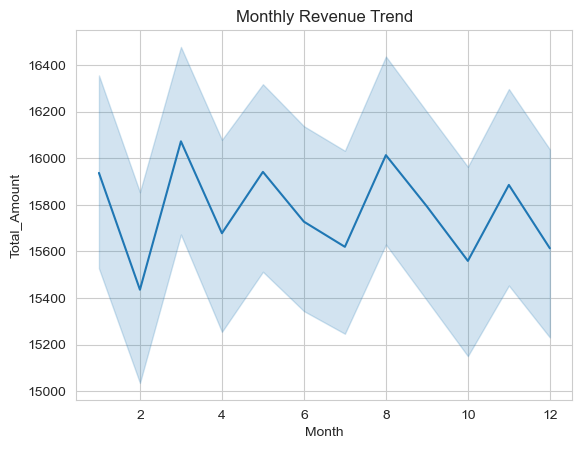

In [45]:
#Visualize monthly revenue using a line chart.
sns.set_style("whitegrid")
plt.title("Monthly Revenue Trend")
sns.lineplot(x = "Month", y="Total_Amount",data=df)
plt.show()


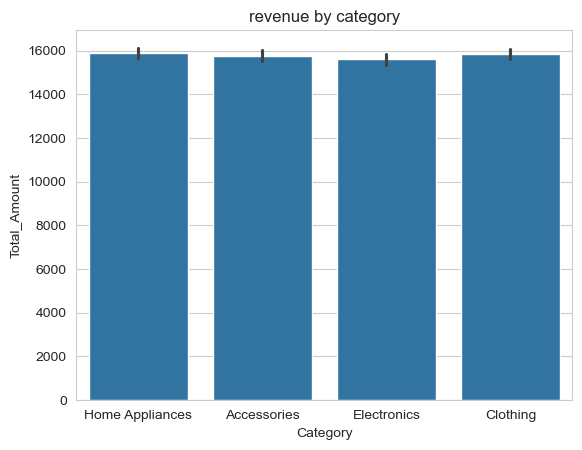

In [46]:
#Create a bar chart for revenue by category.
sns.barplot(x="Category",y="Total_Amount",data=df)
plt.title("revenue by category")
plt.show()

In [47]:
#Plot the top 10 customers by total spending.
top_10 =df.groupby('Customer_ID')['Total_Amount'].sum().reset_index().head()

In [48]:
top_10

,Customer_ID,Total_Amount
0,1000,93919.65
1,1001,112256.31
2,1002,95371.79
3,1003,51902.07
4,1004,72966.15


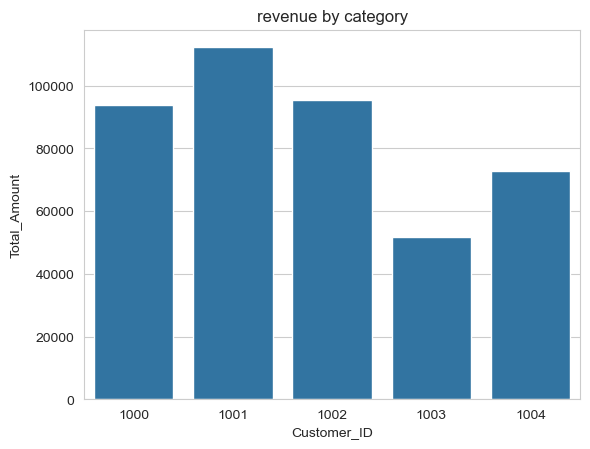

In [49]:
sns.set_style("whitegrid")
sns.barplot(x="Customer_ID",y="Total_Amount",data=top_10)
plt.title("revenue by category")
plt.show()